# **CARGA DE LA BASE DE DATOS**

In [1]:
# Importamos las paqueterías que ocuparemos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Código para omitir los warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargamos la base de datos desde Drive

# ID del archivo de Google Drive
file_id = "1Sc3L35SbDqhRXM8yqZKxAtk1gZ2YZUxM"

# Construir la URL de descarga directa
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Cargar el archivo CSV desde Google Drive
df = pd.read_csv(url)

# Visualizar los primeros 5 registros
df.head()

,Country,Country Code,Year from,Year to,Age from,Age to,Gender,Salivary Gland Cancer,Tongue Cancer,Lip Cancer,Mouth Cancer,Source
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2,Parkin D.M. et al. Cancer Incidence in Five Co...
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5,Parkin D.M. et al. Cancer Incidence in Five Co...
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0,Parkin D.M. et al. Cancer Incidence in Five Co...


In [4]:
# Eliminamos la columna "Source" ya que no aporta información a nuestro análisis

df.drop(columns=['Source'], inplace=True)

# **ANÁLISIS EXPLORATORIO**

In [5]:
# Modificamos los nombres de las columnas

new_column_names = {
    'Country': 'country',
    'Country Code': 'country_code',
    'Year from': 'year_from',
    'Year to': 'year_to',
    'Age from': 'age_from',
    'Age to': 'age_to',
    'Gender': 'gender',
    'Salivary Gland Cancer': 'salivary_gland_cancer(per100000)',
    'Tongue Cancer': 'tongue_cancer(per100000)',
    'Lip Cancer': 'lip_cancer(per100000)',
    'Mouth Cancer': 'mouth_cancer(per100000)'
}
df = df.rename(columns=new_column_names)

,country,country_code,year_from,year_to,age_from,age_to,gender,salivary_gland_cancer(per100000),tongue_cancer(per100000),lip_cancer(per100000),mouth_cancer(per100000)
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0


In [22]:
#Agregamos la columna gender como codificación
df['gender_binary'] = 0
df['gender_binary'][df['gender'] == 'male'] = 1
df.head()

,country,country_code,year_from,year_to,age_from,age_to,gender,salivary_gland_cancer(per100000),tongue_cancer(per100000),lip_cancer(per100000),mouth_cancer(per100000),gender_binary
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2,0
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5,1
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0,0
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0,1
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0,0


In [6]:
# Imprimimos las dimensiones de la base

df.shape

(1733, 11)

In [7]:
# Imprimimos la información cualitativa de las variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1733 non-null   object 
 1   country_code                      1733 non-null   object 
 2   year_from                         1733 non-null   int64  
 3   year_to                           1733 non-null   int64  
 4   age_from                          1611 non-null   float64
 5   age_to                            1497 non-null   float64
 6   gender                            1733 non-null   object 
 7   salivary_gland_cancer(per100000)  1733 non-null   float64
 8   tongue_cancer(per100000)          1733 non-null   float64
 9   lip_cancer(per100000)             1733 non-null   float64
 10  mouth_cancer(per100000)           1733 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 149.1+ KB


In [8]:
def print_unique_values(df, column_name):
    unique_values = df[column_name].value_counts().to_frame()
    unique_values = unique_values.rename(columns = {"count" : "Conteo"})
    print(f'== Valores únicos de la variable "{column_name}" ==\n')
    print(f'{unique_values}\n')

print_unique_values(df, "country")
print_unique_values(df, "year_to")
print_unique_values(df, "year_from")
print_unique_values(df, "age_to")
print_unique_values(df, "age_from")

== Valores únicos de la variable "country" ==

                          Conteo
country                         
United States of America      75
United Kingdom                69
India                         63
Germany                       62
Kuwait                        51
New Zealand                   38
Canada                        38
Czech Republic                38
Singapore                     38
Belarus                       36
Japan                         36
Israel                        36
Croatia                       36
Denmark                       36
Philippines                   36
Netherlands                   36
Finland                       36
Hong Kong                     34
Latvia                        34
China                         34
Sweden                        34
Slovakia                      32
Spain                         32
Costa Rica                    32
Colombia                      32
Norway                        32
Peru                         

In [ ]:
# Número de países con los que contamos
len(df["country"].value_counts())

52

In [19]:
fig = px.treemap(
    df,
    path=['country', 'gender'],
    values='salivary_gland_cancer(per100000)'
)

fig.show()

# **LIMPIEZA**

In [ ]:
# Verificamos la existencia de valores nulos de cada variable

df.isnull().sum()

,0
country,0
country_code,0
year_from,0
year_to,0
age_from,122
age_to,236
gender,0
salivary_gland_cancer(per100000),0
tongue_cancer(per100000),0
lip_cancer(per100000),0


In [ ]:
# Para imputar los valores nulos de la edad, se revisa si existe una diferencia por país en cuanto a las edades

df['age_from'].groupby(df['country']).mean() #Se pensaría que Yugoslavia es el país con valores nulos en las edades

,age_from
country,
Algeria,37.222222
Argentina,55.833333
Australia,52.500000
Austria,52.500000
Belarus,45.000000
Brazil,52.500000
Canada,42.500000
China,46.875000
Colombia,49.333333


In [18]:
df['age_from'].mean() #Promedio de las edades de todo el dataset

46.90254500310366

In [ ]:
# Lista de paises con valores nulos

df[df['age_from'].isnull()]["country"].value_counts()

,count
country,
Singapore,8
Kuwait,4
Israel,4
New Zealand,4
Germany,4
Zimbabwe,4
United Kingdom,4
United States of America,4
Uganda,2


In [ ]:
# Para imputar los valores nulos de la edad, se revisa si además de existir una diferencia por país, también existe por género.

df['age_from'].groupby([df['country'],df['gender']]).mean()

country     gender
Algeria     female    37.222222
            male      37.222222
Argentina   female    55.833333
            male      55.833333
Australia   female    52.500000
                        ...    
Viet Nam    male      37.500000
Yugoslavia  female          NaN
            male            NaN
Zimbabwe    female    51.666667
            male      51.153846
Name: age_from, Length: 104, dtype: float64

**NOTA:** Imputamos los valores nulos con el promedio de edad por país, ya que no se observa una diferencia en las edades por género.

In [ ]:
# Imputamos los valores nulos de las edades usando el promedio

df_mean = df.copy()
mean_age_f = df['age_from'].groupby(df['country']).mean()
mean_age_t = df['age_to'].groupby(df['country']).mean()
df_mean['age_from'].fillna(df_mean['age_from'].mean(), inplace=True)
df_mean['age_to'].fillna(df_mean['age_to'].mean(), inplace=True)
df_mean.isnull().sum() #aqui es para verificar que ya no hay NaNs

,0
country,0
country_code,0
year_from,0
year_to,0
age_from,0
age_to,0
gender,0
salivary_gland_cancer(per100000),0
tongue_cancer(per100000),0
lip_cancer(per100000),0


In [ ]:
print(df[df['country'] == "Viet Nam"]['age_from'].mean()) #Promedio de Vietnam
print(df['age_from'].mean()) #Promedio global

37.5
46.90254500310366


In [ ]:
# Imputamos los valores nulos de las edades usando el mediana

df_median = df.copy()
df_median['age_from'].fillna(df_median['age_from'].median(), inplace=True)
df_median['age_to'].fillna(df_median['age_to'].median(), inplace=True)
df_median.isnull().sum() #aqui es para verificar que ya no hay NaNs

,0
country,0
country_code,0
year_from,0
year_to,0
age_from,0
age_to,0
gender,0
salivary_gland_cancer(per100000),0
tongue_cancer(per100000),0
lip_cancer(per100000),0


**Tarea**

*   agrupar por pais y determinar el promedio de cada categoria en una sola celda




In [ ]:
# Imprimir los promedios globales (FORMATO OPCIONAL)

print(f'== Promedios globales ==\n')
print(f'{("Tipo de cáncer"):25}   Promedio ()')
print(f'---------------------------------------')
print(f'{("Glándula salival"):25} | {df["salivary_gland_cancer(per100000)"].mean():.4f}')
print(f'{("Lengua"):25} | {df["tongue_cancer(per100000)"].mean():.4f}')
print(f'{("Labio"):25} | {df["lip_cancer(per100000)"].mean():.4f}')
print(f'{("Boca"):25} | {df["mouth_cancer(per100000)"].mean():.4f}')

== Promedios globales ==

Tipo de cáncer              Promedio ()
---------------------------------------
Glándula salival          | 1.5499
Lengua                    | 3.4564
Labio                     | 3.4852
Boca                      | 4.5282


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1733 non-null   object 
 1   country_code                      1733 non-null   object 
 2   year_from                         1733 non-null   int64  
 3   year_to                           1733 non-null   int64  
 4   age_from                          1611 non-null   float64
 5   age_to                            1497 non-null   float64
 6   gender                            1733 non-null   object 
 7   salivary_gland_cancer(per100000)  1733 non-null   float64
 8   tongue_cancer(per100000)          1733 non-null   float64
 9   lip_cancer(per100000)             1733 non-null   float64
 10  mouth_cancer(per100000)           1733 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 149.1+ KB


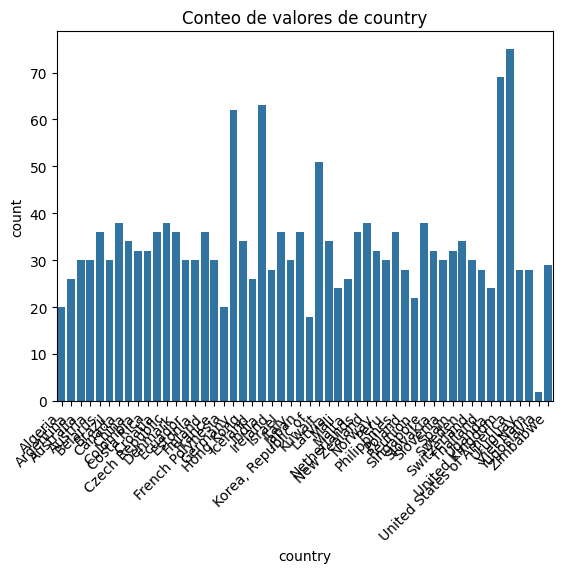

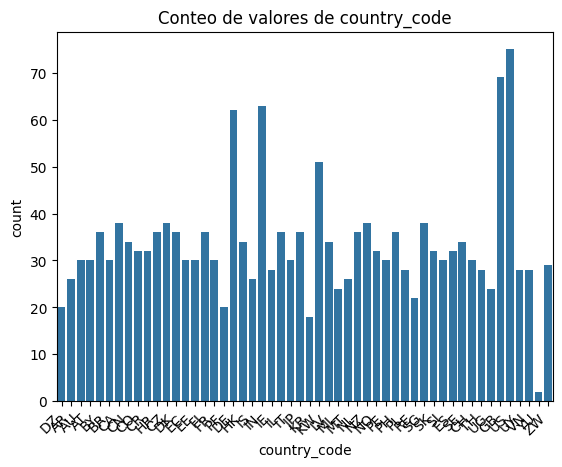

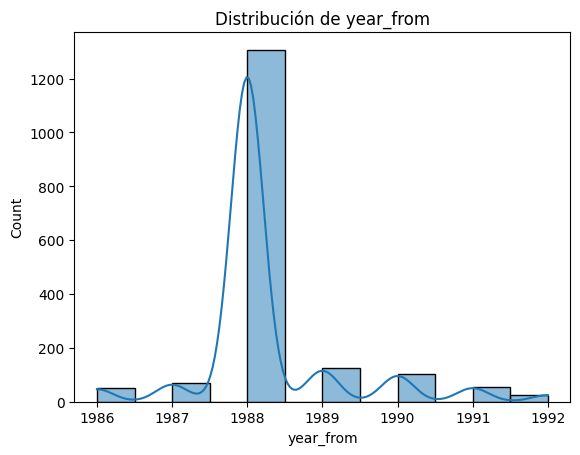

<Figure size 640x480 with 0 Axes>

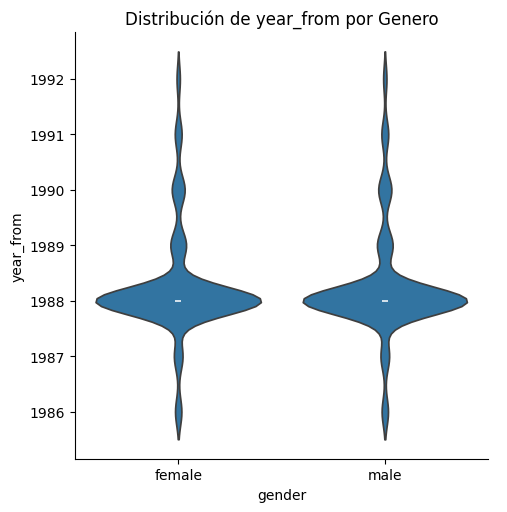

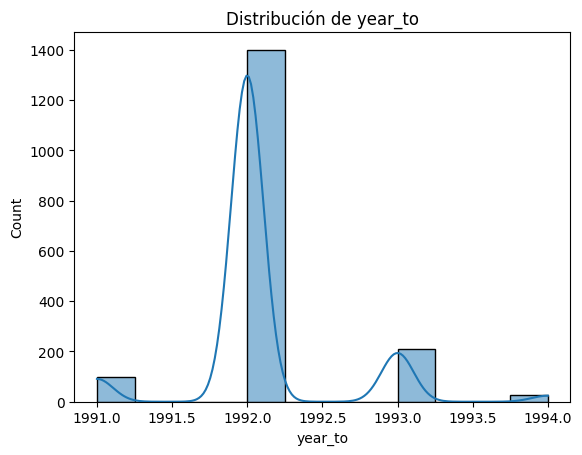

<Figure size 640x480 with 0 Axes>

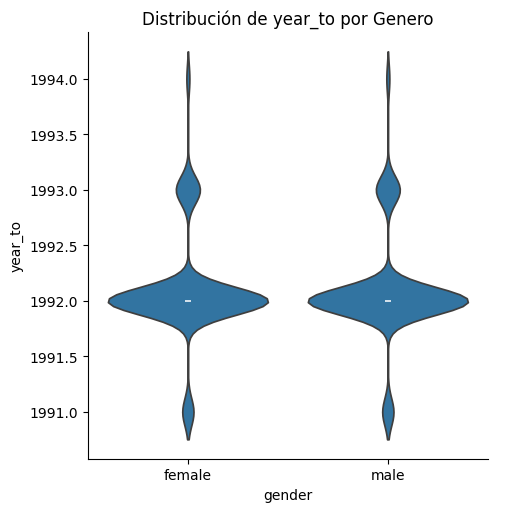

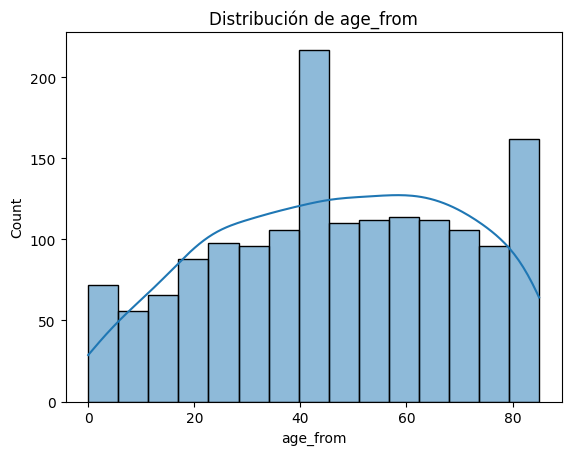

<Figure size 640x480 with 0 Axes>

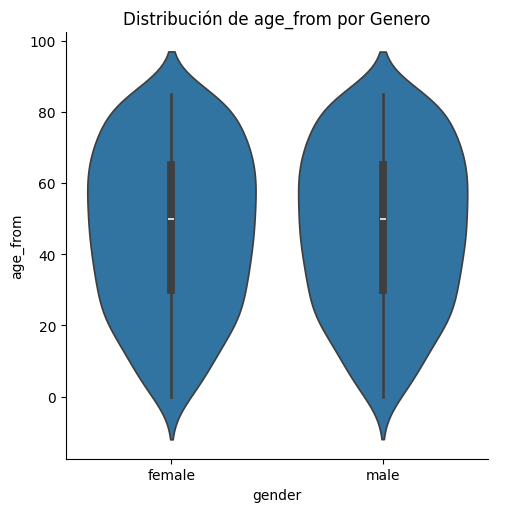

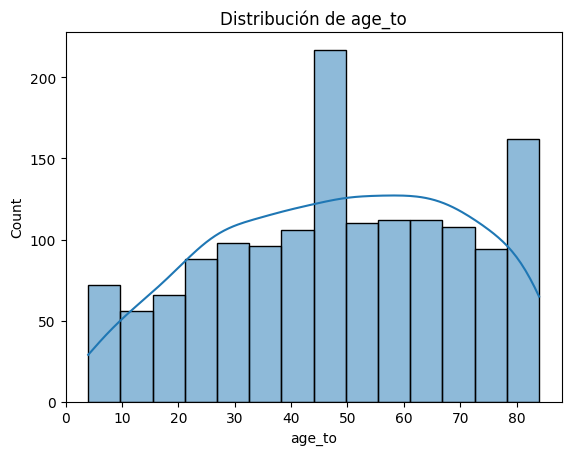

<Figure size 640x480 with 0 Axes>

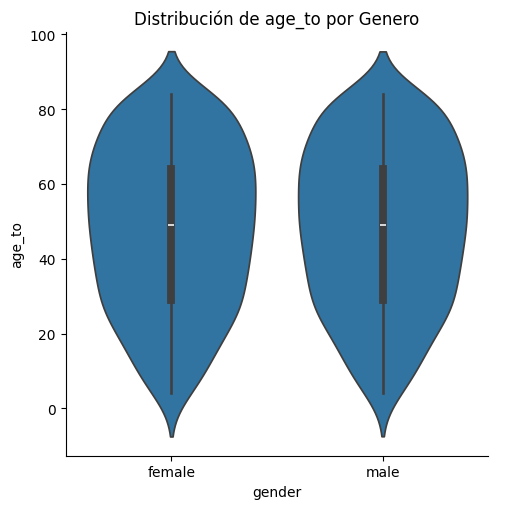

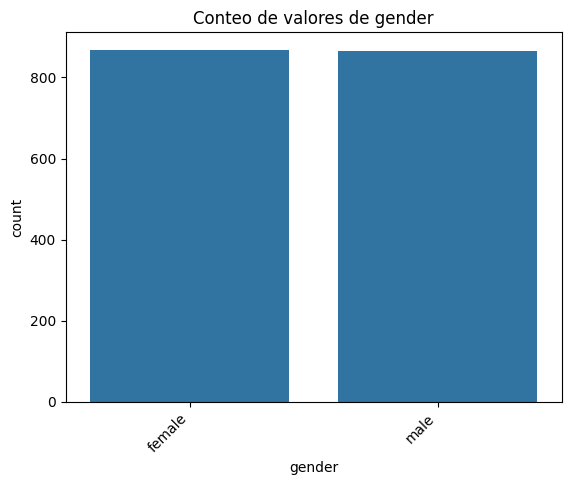

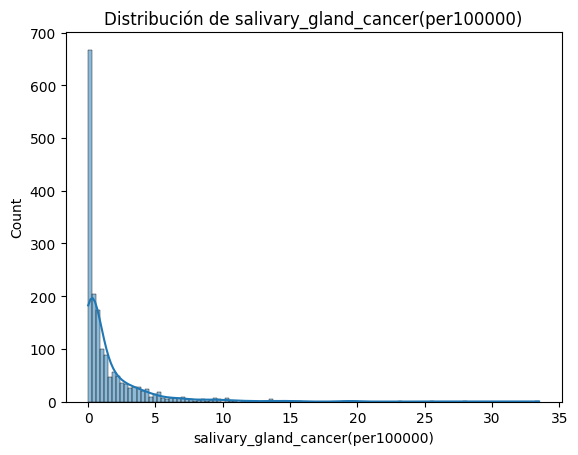

<Figure size 640x480 with 0 Axes>

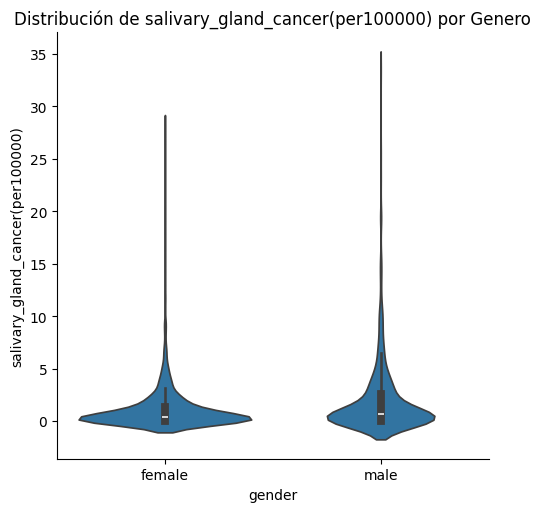

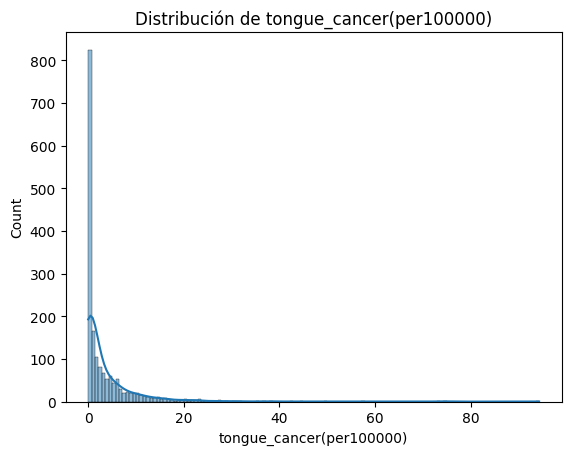

<Figure size 640x480 with 0 Axes>

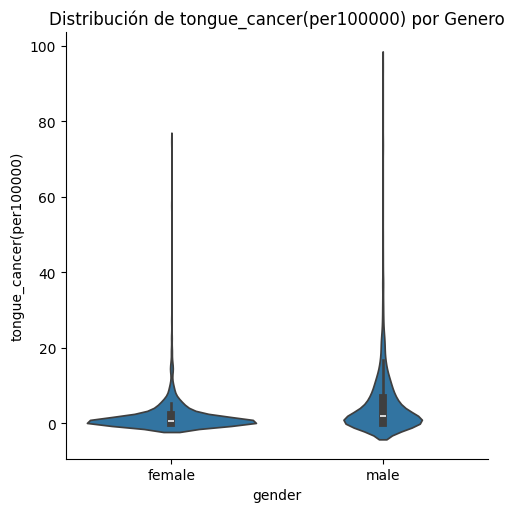

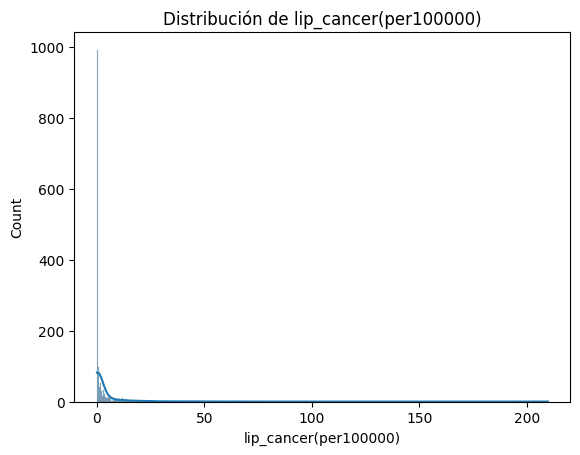

<Figure size 640x480 with 0 Axes>

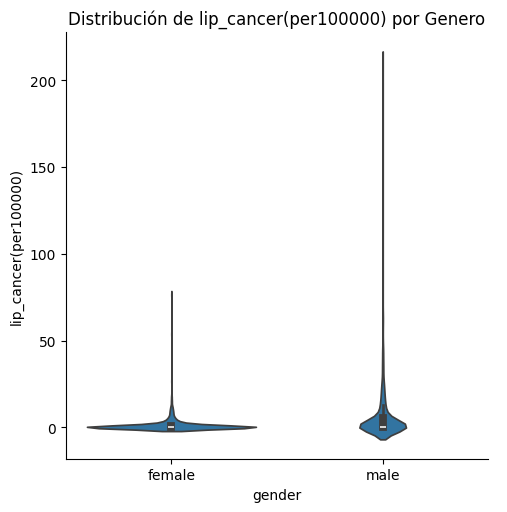

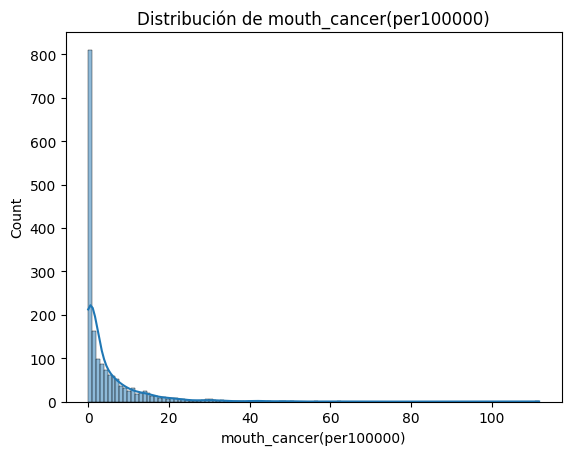

<Figure size 640x480 with 0 Axes>

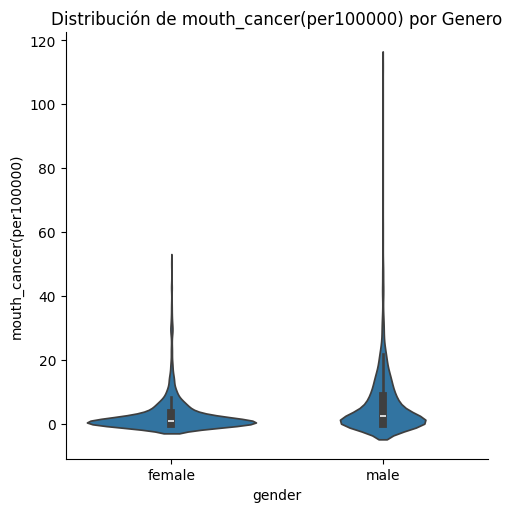

In [10]:
# prompt: análisis exploratorio data frame

import pandas as pd
import matplotlib.pyplot as plt
# Información general del DataFrame
df.info()

# Estadísticas descriptivas de las variables numéricas
df.describe()

# Conteo de valores faltantes por columna
df.isnull().sum()

# Análisis de la distribución de las variables
for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()
    ### Se agrega una grafica de violin por genero de la variable numerica
    plt.figure()
    sns.catplot(x = 'gender', y = df[column], data = df, kind = "violin");
    plt.title(f'Distribución de {column} por Genero')
    plt.show()
  else:
    plt.figure()
    sns.countplot(x=column, data=df)
    plt.title(f'Conteo de valores de {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [ ]:
### Para obtener la matriz de correlacion filtramos columnas numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
# Correlación entre las variables
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

### Las variables mouth_cancer(per100000), tongue_cancer(per100000) son las mas correlacionadas
plt.figure()
sns.scatterplot(x='mouth_cancer(per100000)', y='tongue_cancer(per100000)', data=df_numeric)
plt.title('Relación entre mouth cancer y tongue_cancer')
plt.show()

# Puedes agregar más análisis según tus necesidades, como:
# - Boxplots para identificar outliers
# - Análisis de la distribución de las variables por grupos (ej. tipo de cáncer)
# - Gráficos de violín para comparar la distribución de las variables entre grupos

#Modelo

In [20]:
# prompt: count unique values

def count_unique_in_column(df, column_name):
    """Counts unique values in a specified column of a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
        column_name: The name of the column to analyze.

    Returns:
        A Pandas Series containing unique values and their counts, or None if the column doesn't exist.
    """
    if column_name in df.columns:
        return df[column_name].value_counts()
    else:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return None

# Example usage (assuming 'df' is your DataFrame):
unique_countries = count_unique_in_column(df, 'country')
if unique_countries is not None:
    print("Unique Countries and their counts:")
    print(unique_countries)

unique_years_from = count_unique_in_column(df, 'year_from')
if unique_years_from is not None:
    print("\nUnique 'year_from' values and counts:")
unique_years_from

# ... repeat for other columns

Unique Countries and their counts:
country
United States of America    75
United Kingdom              69
India                       63
Germany                     62
Kuwait                      51
New Zealand                 38
Canada                      38
Czech Republic              38
Singapore                   38
Belarus                     36
Japan                       36
Israel                      36
Croatia                     36
Denmark                     36
Philippines                 36
Netherlands                 36
Finland                     36
Hong Kong                   34
Latvia                      34
China                       34
Sweden                      34
Slovakia                    32
Spain                       32
Costa Rica                  32
Colombia                    32
Norway                      32
Peru                        30
Switzerland                 30
Slovenia                    30
Italy                       30
France                     

,count
year_from,
1988,1308
1989,124
1990,103
1987,68
1991,54
1986,50
1992,26


In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4, max_iter=10000)

In [ ]:
k_means.fit(df[['salivary_gland_cancer(per100000)']])

KMeans(max_iter=10000, n_clusters=4)

In [ ]:
centers = k_means.cluster_centers_

centers

array([[ 3.11111111],
       [ 8.03111111],
       [18.38095238],
       [ 0.40085938]])

In [ ]:
clasificaciones = k_means.predict(df[['gender_binary','salivary_gland_cancer(per100000)']])

clasificaciones

array([0, 2, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
df['clasificacion'] = clasificaciones
df.head()

,country,country_code,year_from,year_to,age_from,age_to,gender,salivary_gland_cancer(per100000),tongue_cancer(per100000),lip_cancer(per100000),mouth_cancer(per100000),clasificacion,gender_binary
0,Algeria,DZ,1990,1993,NaN,NaN,female,0.1,0.0,0.1,0.2,0,0
1,Algeria,DZ,1990,1993,NaN,NaN,male,2.3,0.2,0.6,0.5,2,1
2,Algeria,DZ,1990,1993,5.0,9.0,female,0.0,0.0,0.0,0.0,0,0
3,Algeria,DZ,1990,1993,5.0,9.0,male,0.0,0.0,0.3,0.0,0,1
4,Algeria,DZ,1990,1993,15.0,19.0,female,0.0,0.0,0.0,0.0,0,0


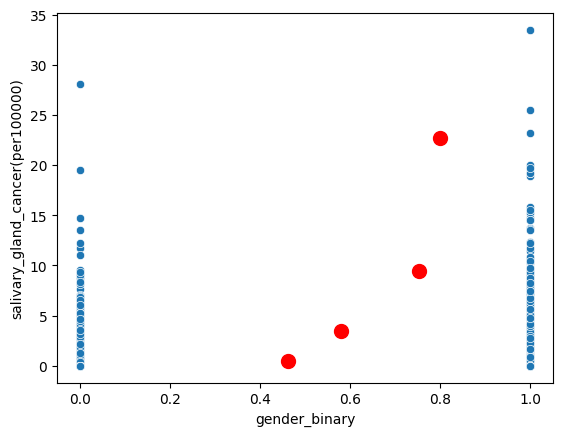

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

sns.scatterplot(x=df['gender_binary'], y=df['salivary_gland_cancer(per100000)'], ax=ax);
ax.scatter(centers[:,0], centers[:,1], color='red', s=100);

In [ ]:
groups = pd.DataFrame(df.groupby(['clasificacion', 'gender', 'age_from', 'age_to'])['gender'].count())